<a href="https://colab.research.google.com/github/Kailunwrites/Kaggle-Machine-Learning-Housing-Project-/blob/master/kailun_cheng/Python%20Notebooks_DataCleaning/Housing_Prices_ML_Feature_Engineering_Train_Test_Encode_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kailun Section Categorical Only

##Load Data and Import Libs

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [3]:
cd /content/drive/My\ Drive/Data Science Bootcamp 2019 /Housing_Project/

/content/drive/My Drive/Data Science Bootcamp 2019 /Housing_Project


In [4]:
ls

 DataExploration_jah.ipynb
'Housing Prices ML_Feature Engineering_Train_Test_Encode_all.ipynb'
 test1.csv
 test_all0.csv
 test.csv
 train1.csv
 train_all0.csv
 train.csv


In [0]:
filename= r'train.csv'
filename2= r'test.csv'
train_data = pd.read_csv(filename)
test_data = pd.read_csv(filename2)

##Examine Data (Make sure data loaded correctly)

In [0]:
#train_data.drop("Id", 1, inplace=True)  # remove ID column, uncomment if doing modelling on its own 
train_data.head()

In [0]:
#test_data.drop("Id", 1, inplace=True)  # remove ID column
test_data.head()  # exactly the same features 

## Kailun Data Description and comments 



BsmtCond: Evaluates the general condition of the basement   

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

#########################################################

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


## Response Variable  (+ transformation)



visualize the log transform of the response variable.  Log transform able to normalize the response variable 

In [0]:
train_data_plot['SalePrice_log']= np.log(train_data_plot['SalePrice'])

In [0]:
sns.distplot(train_data_cat_var['SalePrice_log'])

##Categorical Indep. Variables All data cleaning train



In [8]:
cat_var_all= ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
              'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
              'PoolQC', 'Fence', 'MiscFeature','SaleType', 'SaleCondition', 'SalePrice_log', 'SalePrice']
len(cat_var_all)  #should return 24

24

In [0]:
train_data_cat_var= pd.DataFrame(train_data, columns=cat_var_all)

In [0]:
train_data_cat_var.sample(10)

### Null columns? or NA?

In [10]:
train_data_cat_var.info()  #initial info with all null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinType1     1423 non-null object
BsmtFinType2     1422 non-null object
Heating          1460 non-null object
HeatingQC        1460 non-null object
CentralAir       1460 non-null object
Electrical       1459 non-null object
KitchenQual      1460 non-null object
Functional       1460 non-null object
FireplaceQu      770 non-null object
GarageType       1379 non-null object
GarageFinish     1379 non-null object
GarageQual       1379 non-null object
GarageCond       1379 non-null object
PavedDrive       1460 non-null object
PoolQC           7 non-null object
Fence            281 non-null object
MiscFeature      54 non-null object
SaleType         1460 non-null object
SaleCondition    1460 non-null object
SalePrice_log    1460 non-null float64
SalePrice        1460 non

#### Bsmt related 
Replace null with NA 

if BsmtQual!=null & BsmtCond!= null & BsmtExposure==null:
  BsmtExposure= No


In [0]:
#mask=train_data_cat_var['BsmtCond'].isnull()
#obtain the index with the rows that are null 
# make sure all of the no Bsmt houses line up 
bsmt_null_list=np.array(train_data_cat_var['BsmtCond'][train_data_cat_var['BsmtCond'].isnull()].index)
bsmt_null_list2=np.array(train_data_cat_var['BsmtQual'][train_data_cat_var['BsmtQual'].isnull()].index)
bsmt_null_list3=np.array(train_data_cat_var['BsmtExposure'][train_data_cat_var['BsmtExposure'].isnull()].index)
bsmt_null_list4=np.array(train_data_cat_var['BsmtFinType1'][train_data_cat_var['BsmtFinType1'].isnull()].index)
bsmt_null_list5=np.array(train_data_cat_var['BsmtFinType2'][train_data_cat_var['BsmtFinType2'].isnull()].index)

In [12]:
import collections
if collections.Counter(bsmt_null_list)==collections.Counter(bsmt_null_list2)==collections.Counter(bsmt_null_list3)==collections.Counter(bsmt_null_list4):
    print("same")
else:
  print("no")

print(list(set(bsmt_null_list3)- set(bsmt_null_list5)))

no
[948]


In [13]:
# check the length of the BsmtFinSF that's not 0 
len(np.array(train_data['BsmtFinSF2'][train_data['BsmtFinSF2']!=0].index))/ len(train_data['BsmtFinSF2'])

0.11438356164383562

In [0]:
train_data_cat_var['BsmtQual'].fillna("None", inplace=True)
train_data_cat_var['BsmtCond'].fillna("None", inplace=True)
train_data_cat_var['BsmtExposure'].fillna("None", inplace=True)
train_data_cat_var['BsmtFinType1'].fillna("None", inplace=True)
train_data_cat_var['BsmtFinType2'].fillna("None", inplace=True)
train_data_cat_var.at[948,'BsmtExposure']='No'

#### Electrical Fill with Mode

In [0]:
train_data_cat_var['Electrical'].fillna(train_data_cat_var['Electrical'].mode()[0], inplace=True)

#### FireplaceQu

In [0]:
fireplace_null_list=np.array(train_data_cat_var['FireplaceQu'][train_data_cat_var['FireplaceQu'].isnull()].index)

In [355]:
len(train_data_cat_var['FireplaceQu'][fireplace_null_list]) # 690 is what we want 

690

In [0]:
train_data_cat_var['FireplaceQu'].fillna("None", inplace=True)

#### Garage related 

In [19]:
# Need to first check whether the garage variables line up, if none garage lines up 
garage_null_list=np.array(train_data_cat_var['GarageType'][train_data_cat_var['GarageType'].isnull()].index)
garage_null_list2=np.array(train_data_cat_var['GarageFinish'][train_data_cat_var['GarageFinish'].isnull()].index)
garage_null_list3=np.array(train_data_cat_var['GarageQual'][train_data_cat_var['GarageQual'].isnull()].index)
garage_null_list4=np.array(train_data_cat_var['GarageCond'][train_data_cat_var['GarageCond'].isnull()].index)

import collections
if collections.Counter(garage_null_list2)==collections.Counter(garage_null_list4)==collections.Counter(garage_null_list3):
    print("same")
else:
  print("no")

same


In [0]:
train_data_cat_var['GarageType'].fillna("None", inplace=True)
train_data_cat_var['GarageFinish'].fillna("None", inplace=True)
train_data_cat_var['GarageQual'].fillna("None", inplace=True)
train_data_cat_var['GarageCond'].fillna("None", inplace=True)

#### PoolQC, Fence, MiscFeature turn into strict cat 

In [0]:
#mask= train_data_cat_var['PoolQC'].isnull
train_data_cat_var['PoolQC'].fillna("None", inplace=True)

In [0]:
train_data_cat_var['Fence'].fillna("None", inplace=True)

In [0]:
train_data_cat_var['MiscFeature'].fillna("None", inplace=True)

In [0]:
#train_data_cat_var['MiscFeature'][train_data_cat_var['MiscFeature']=="NoTFeat"]= "None"

#### Check for null values NOW again by doing .info()

In [361]:
train_data_cat_var.info()
#train_data_cat_var.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
BsmtQual         1460 non-null object
BsmtCond         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinType1     1460 non-null object
BsmtFinType2     1460 non-null object
Heating          1460 non-null object
HeatingQC        1460 non-null object
CentralAir       1460 non-null object
Electrical       1460 non-null object
KitchenQual      1460 non-null object
Functional       1460 non-null object
FireplaceQu      1460 non-null object
GarageType       1460 non-null object
GarageFinish     1460 non-null object
GarageQual       1460 non-null object
GarageCond       1460 non-null object
PavedDrive       1460 non-null object
PoolQC           1460 non-null object
Fence            1460 non-null object
MiscFeature      1460 non-null object
SaleType         1460 non-null object
SaleCondition    1460 non-null object
SalePrice_log    1460 non-null float64
SalePrice        1

##Categorical Indep. Variables All data cleaning testing



In [24]:
cat_var_all= ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
              'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
              'PoolQC', 'Fence', 'MiscFeature','SaleType', 'SaleCondition', 'SalePrice_log', 'SalePrice']
len(cat_var_all)  #should return 24

24

In [0]:
test_data_cat_var= pd.DataFrame(test_data, columns=cat_var_all).drop(['SalePrice_log', 'SalePrice'], axis=1)

In [30]:
test_data_cat_var.shape

(1459, 22)

### Null columns? or NA?

In [31]:
test_data_cat_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 22 columns):
BsmtQual         1415 non-null object
BsmtCond         1414 non-null object
BsmtExposure     1415 non-null object
BsmtFinType1     1417 non-null object
BsmtFinType2     1417 non-null object
Heating          1459 non-null object
HeatingQC        1459 non-null object
CentralAir       1459 non-null object
Electrical       1459 non-null object
KitchenQual      1458 non-null object
Functional       1457 non-null object
FireplaceQu      729 non-null object
GarageType       1383 non-null object
GarageFinish     1381 non-null object
GarageQual       1381 non-null object
GarageCond       1381 non-null object
PavedDrive       1459 non-null object
PoolQC           3 non-null object
Fence            290 non-null object
MiscFeature      51 non-null object
SaleType         1458 non-null object
SaleCondition    1459 non-null object
dtypes: object(22)
memory usage: 250.9+ KB


#### Bsmt related 
Replace null with NA 

if BsmtQual!=null & BsmtCond!= null & BsmtExposure==null:
  BsmtExposure= No


In [0]:
#mask=train_data_cat_var['BsmtCond'].isnull()
#obtain the index with the rows that are null 

In [0]:
# make sure all of the no Bsmt houses line up 
bsmt_null_list=np.array(test_data_cat_var['BsmtCond'][test_data_cat_var['BsmtCond'].isnull()].index)
bsmt_null_list2=np.array(test_data_cat_var['BsmtQual'][test_data_cat_var['BsmtQual'].isnull()].index)
bsmt_null_list3=np.array(test_data_cat_var['BsmtExposure'][test_data_cat_var['BsmtExposure'].isnull()].index)
bsmt_null_list4=np.array(test_data_cat_var['BsmtFinType1'][test_data_cat_var['BsmtFinType1'].isnull()].index)
bsmt_null_list5=np.array(test_data_cat_var['BsmtFinType2'][test_data_cat_var['BsmtFinType2'].isnull()].index)

In [33]:
import collections
if collections.Counter(bsmt_null_list)==collections.Counter(bsmt_null_list2)==collections.Counter(bsmt_null_list3)==collections.Counter(bsmt_null_list4):
    print("same")
else:
  print("no")

no


In [35]:
print(list(set(bsmt_null_list2)- set(bsmt_null_list3)))
print(list(set(bsmt_null_list4)- set(bsmt_null_list5)))
print(list(set(bsmt_null_list)- set(bsmt_null_list5)))

[757, 758]
[]
[1064, 580, 725]


In [0]:
test_data_cat_var.loc[1064] # should be No instead of NA 

In [0]:
# first replace Null with None 
test_data_cat_var['BsmtQual'].fillna("None", inplace=True)
test_data_cat_var['BsmtCond'].fillna("None", inplace=True)
test_data_cat_var['BsmtExposure'].fillna("None", inplace=True)
test_data_cat_var['BsmtFinType1'].fillna("None", inplace=True)
test_data_cat_var['BsmtFinType2'].fillna("None", inplace=True)

In [0]:
# BsmtCond can be filled in with mode 
test_data_cat_var.at[1064,'BsmtCond']= test_data_cat_var['BsmtCond'].mode()[0]
test_data_cat_var.at[580,'BsmtCond']= test_data_cat_var['BsmtCond'].mode()[0]
test_data_cat_var.at[725,'BsmtCond']= test_data_cat_var['BsmtCond'].mode()[0]

In [0]:
# BsmtQual can be filled in with mode 
test_data_cat_var.at[757,'BsmtQual']= test_data_cat_var['BsmtQual'].mode()[0]
test_data_cat_var.at[758,'BsmtQual']= test_data_cat_var['BsmtQual'].mode()[0]

In [0]:
test_data_cat_var.at[888,'BsmtExposure']= test_data_cat_var['BsmtExposure'].mode()[0]
test_data_cat_var.at[27,'BsmtExposure']= test_data_cat_var['BsmtExposure'].mode()[0]

In [40]:
test_data_cat_var.loc[580]

BsmtQual             Gd
BsmtCond             TA
BsmtExposure         Mn
BsmtFinType1        GLQ
BsmtFinType2        Rec
Heating            GasA
HeatingQC            Ex
CentralAir            Y
Electrical        SBrkr
KitchenQual          Ex
Functional          Typ
FireplaceQu          Gd
GarageType       Attchd
GarageFinish        RFn
GarageQual           TA
GarageCond           TA
PavedDrive            Y
PoolQC              NaN
Fence              GdWo
MiscFeature         NaN
SaleType             WD
SaleCondition    Normal
Name: 580, dtype: object

In [325]:
len(np.array(test_data['BsmtFinSF2'][test_data['BsmtFinSF2']!=0].index))/ len(test_data['BsmtFinSF2'])  # large percentage of BsmtFinSF2 is empty

0.12405757368060315

#### Kitchen Qual

In [0]:
kitchen_null_list=test_data_cat_var['KitchenQual'][test_data_cat_var['KitchenQual'].isnull()].index

In [50]:
test_data.loc[kitchen_null_list]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NaN,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal


In [0]:
test_data_cat_var.at[95,'KitchenQual']= test_data_cat_var['KitchenQual'].mode()[0]

#### FireplaceQu

In [0]:
fireplace_null_list=test_data_cat_var['FireplaceQu'][test_data_cat_var['FireplaceQu'].isnull()].index

In [0]:
test_data.loc[fireplace_null_list]

In [58]:
len(test_data_cat_var['FireplaceQu'][fireplace_null_list]) # 730 is what we want 

730

In [0]:
test_data_cat_var['FireplaceQu'].fillna("None", inplace=True)

#### Garage related 

In [44]:
garage_null_list=np.array(test_data_cat_var['GarageType'][test_data_cat_var['GarageType'].isnull()].index)
garage_null_list2=np.array(test_data_cat_var['GarageFinish'][test_data_cat_var['GarageFinish'].isnull()].index)
garage_null_list3=np.array(test_data_cat_var['GarageQual'][test_data_cat_var['GarageQual'].isnull()].index)
garage_null_list4=np.array(test_data_cat_var['GarageCond'][test_data_cat_var['GarageCond'].isnull()].index)

import collections
# GarageFinish, GarageQual and GarageCond all are lining up for 
if collections.Counter(garage_null_list2)==collections.Counter(garage_null_list4)==collections.Counter(garage_null_list3):
    print("same")
else:
  print("no")

same


In [45]:
list(set(garage_null_list4)- set(garage_null_list))
#list(set(garage_null_list4)- set(garage_null_list2))

[666, 1116]

In [54]:
test_data.loc[list(set(garage_null_list4)- set(garage_null_list))] # observe that for 666, there is sqfeet for garage

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
666,2127,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,NaN,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal
1116,2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


In [0]:
# Fill with null first, then fill with 
test_data_cat_var['GarageType'].fillna("None", inplace=True)
test_data_cat_var['GarageFinish'].fillna("None", inplace=True)
test_data_cat_var['GarageQual'].fillna("None", inplace=True)
test_data_cat_var['GarageCond'].fillna("None", inplace=True)

In [0]:
test_data_cat_var.at[666,'GarageFinish']= test_data_cat_var['GarageFinish'].mode()[0]
test_data_cat_var.at[666,'GarageQual']= test_data_cat_var['GarageQual'].mode()[0]
test_data_cat_var.at[666,'GarageCond']= test_data_cat_var['GarageCond'].mode()[0]
test_data_cat_var.at[1116,'GarageType']= "None"

#### PoolQC, Fence, MiscFeature, Functional, SaleType

In [0]:
#mask= train_data_cat_var['PoolQC'].isnull
test_data_cat_var['PoolQC'].fillna("None", inplace=True)

In [0]:
test_data_cat_var['Fence'].fillna("None", inplace=True)

In [0]:
test_data_cat_var['MiscFeature'].fillna("None", inplace=True)

In [0]:
test_data_cat_var['Functional'].fillna(test_data_cat_var['Functional'].mode()[0], inplace=True)

In [0]:
test_data_cat_var['SaleType'].fillna(test_data_cat_var['SaleType'].mode()[0], inplace=True)

In [0]:
#train_data_cat_var['MiscFeature'][train_data_cat_var['MiscFeature']=="NoTFeat"]= "None"

#### Check for null values NOW again by doing .info()

In [0]:
test_data_cat_var.info()
#train_data_cat_var.isnull().sum(axis=0)

## Count Plots for strictly categorical variables 

In [13]:
train_data_plot.head()

,Unnamed: 0,SalePrice_log,SalePrice,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,HasGasHeating_1,HasSBrkr_1,HasEx_1,HasGd_1,HasGLQ_1,HasPavedDrive_1,HasTA_1
0,0,12.247694,208500,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1
1,1,12.109011,181500,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1
2,2,12.317167,223500,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1
3,3,11.849398,140000,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1
4,4,12.429216,250000,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1


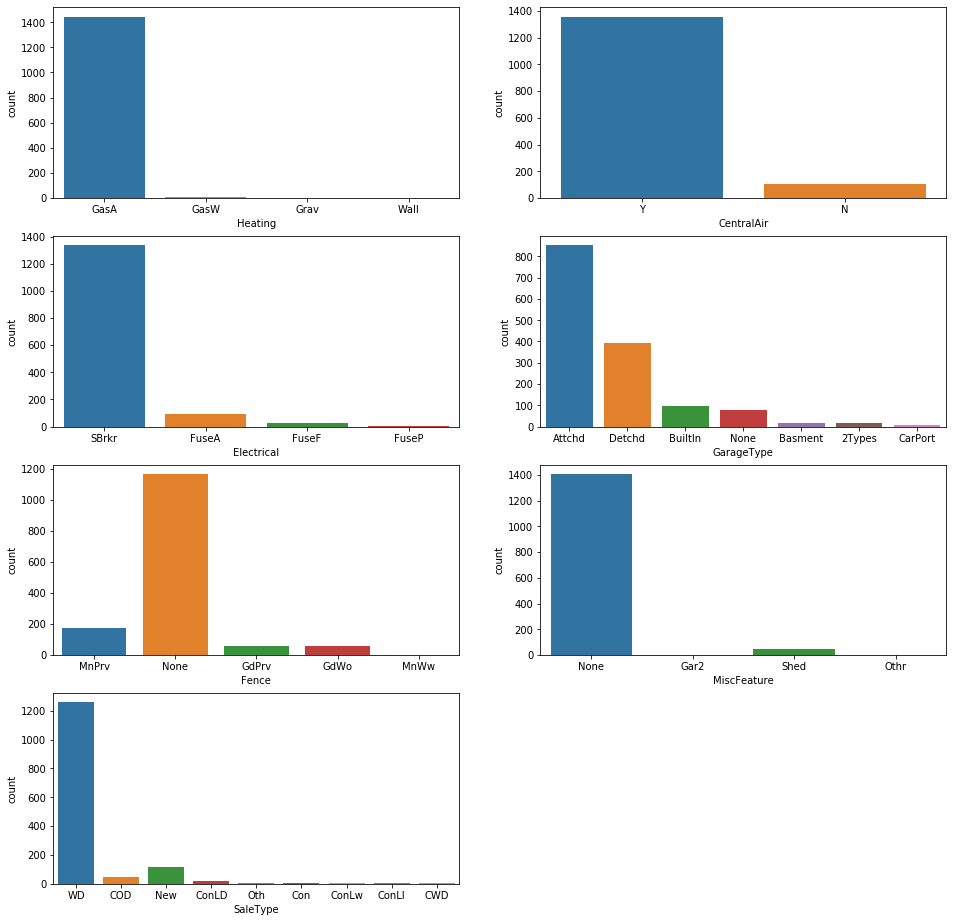

In [0]:
cat_var_only= ['Heating', 'CentralAir', 'Electrical', 'GarageType', 'Fence', 'MiscFeature', 'SaleType' ]  # The categories are strictly category

cat_var_ordinal= ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 
                  'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',  'SaleCondition']

#cat_var_only_eng= ['Bsmt_yes','Heating_Floor_yes', 'Central_Air_yes', 'Electrical_SBrkr_yes', 
                   #'Pool_yes', 'Fence_yes', 'Elev_yes', 'Gar2_yes', 'Shed_yes', 'TenC_yes']


plt.figure(figsize=(16, 75))
for idx, col in enumerate(cat_var_only):
    plt.subplot(18, 2, idx + 1)
    sns.countplot(test_data_cat_var[col])

## Count Plots for Ordinal variable


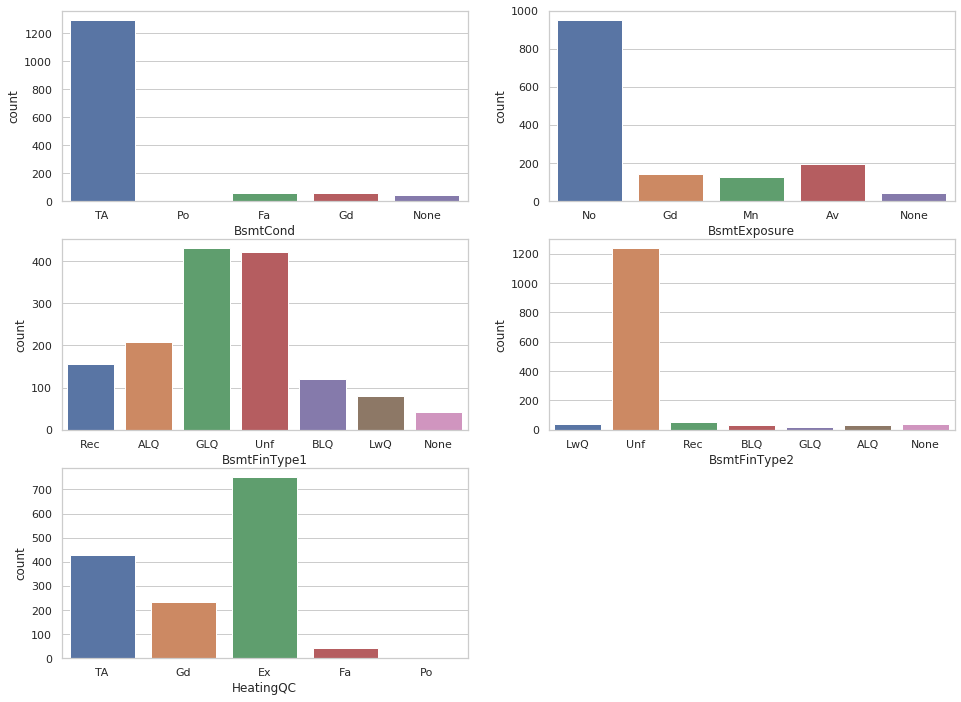

In [0]:
cat_var_ordinal= ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 
                  'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',  'SaleCondition']

sns.set(style="whitegrid")
plt.figure(figsize=(16, 75))
for idx, col in enumerate(cat_var_ordinal[1:6]):
    plt.subplot(18, 2, idx + 1)
    sns.countplot(test_data_cat_var[col])

## Categorical Mapping Onto Numerical Training and testing STARTING FROM SCRATCH

In [0]:
drop_less_five= ['PoolQC', 'MiscFeature']
train_data_cat_var_final = train_data_cat_var.drop(drop_less_five, axis=1)
test_data_cat_var_final = test_data_cat_var.drop(drop_less_five, axis=1)

In [0]:
cols=list(test_data_cat_var_final.columns)  # use test here 

In [97]:
# For every column in testing and training sets, find the columns that do not match in subcategories 
for col in cols: 
  if list(train_data_cat_var[col].value_counts().index)==list(test_data_cat_var[col].value_counts().index):
    print ('same proportions '+ col)
  else:
    print(col)

BsmtQual
BsmtCond
same proportions BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
same proportions HeatingQC
same proportions CentralAir
Electrical
same proportions KitchenQual
same proportions Functional
FireplaceQu
GarageType
same proportions GarageFinish
GarageQual
GarageCond
same proportions PavedDrive
same proportions Fence
SaleType
same proportions SaleCondition


In [1]:
print(train_data_cat_var_final['GarageQual'].value_counts())
print(test_data_cat_var_final['GarageQual'].value_counts())

NameError: ignored

In [0]:
# Do best to not combine categories that are ordinal
# ONLY HAD to combine GarageQual because of different train and test proportions 

turn_ordinal = {"BsmtQual":     {"None": 1, "Po": 2, "Fa":3, "TA":4, "Gd":5, "Ex":6},
                "BsmtCond":     {"None": 1, "Po": 2, "Fa":3, "TA":4, "Gd":5, "Ex":6},
                "BsmtExposure": {"None": 1, "No": 2, "Mn": 3, "Av": 4, "Gd":5}, 
                "BsmtFinType1": {"None": 1, "Unf":2, "LwQ":3, "Rec":4, "BLQ":5, "ALQ":6,"GLQ":7}, 
                "BsmtFinType2": {"None": 1, "Unf":2, "LwQ":3, "Rec":4, "BLQ":5, "ALQ":6,"GLQ":7},
                "HeatingQC":    {"Po": 1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
                "KitchenQual":  {"Po": 1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
                "Functional":    {"Sal":1, "Sev":2,"Maj2":3, "Maj1":4, "Mod":5, "Min2":6, "Min1":7, "Typ":8},
                "FireplaceQu":   {"None":1, "Po": 2, "Fa":3, "TA":4, "Gd":5, "Ex":6},
                "GarageFinish":  {"None":1, "Unf":2, "RFn":3, "Fin":4},
                "GarageCond":    {"None": 1, "Po": 2, "Fa":3, "TA":4, "Gd":5, "Ex":6},
                "Fence":         {"None":1, "MnWw":2, "GdWo":3, "MnPrv":4, "GdPrv":5}
                }

#https://pbpython.com/categorical-encoding.html

In [0]:
train_data_cat_var_final.replace(turn_ordinal, inplace=True)

In [101]:
test_data_cat_var_final.replace(turn_ordinal, inplace=True)
test_data_cat_var_final.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,4,4,2,4,3,GasA,3,Y,SBrkr,3,8,1,Attchd,2,TA,4,Y,4,WD,Normal
1,4,4,2,6,2,GasA,3,Y,SBrkr,4,8,1,Attchd,2,TA,4,Y,1,WD,Normal
2,5,4,2,7,2,GasA,4,Y,SBrkr,3,8,4,Attchd,4,TA,4,Y,4,WD,Normal
3,4,4,2,7,2,GasA,5,Y,SBrkr,4,8,5,Attchd,4,TA,4,Y,1,WD,Normal
4,5,4,2,6,2,GasA,5,Y,SBrkr,4,8,1,Attchd,3,TA,4,Y,1,WD,Normal


In [0]:
# observed unequal proportions for GasHeating, all other proportions are less than 5%, GasW has higher means and medians
train_data_cat_var_final['HasGasHeating'] = pd.Series(len(train_data_cat_var_final['Heating']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasGasHeating'] = 0 
train_data_cat_var_final.loc[train_data_cat_var_final['Heating']== 'GasA','HasGasHeating'] = 1
train_data_cat_var_final.loc[train_data_cat_var_final['Heating']== 'GasW','HasGasHeating'] = 1

In [0]:
train_data_cat_var_final['Electrical_combined'] = pd.Series(len(train_data_cat_var_final['Electrical']), index=train_data_cat_var_final.index)
train_data_cat_var_final['Electrical_combined'] = 0
train_data_cat_var_final.loc[train_data_cat_var_final['Electrical']== 'SBrkr','Electrical_combined'] = 1
train_data_cat_var_final.loc[train_data_cat_var_final['Electrical']== 'FuseA','Electrical_combined'] = 2

In [0]:
train_data_cat_var_final['GarageType_combined'] = pd.Series(len(train_data_cat_var_final['GarageType']), index=train_data_cat_var_final.index)
train_data_cat_var_final['GarageType_combined'] = 0 
train_data_cat_var_final.loc[train_data_cat_var_final['GarageType']== 'Attchd','GarageType_combined'] = 1
train_data_cat_var_final.loc[train_data_cat_var_final['GarageType']== 'Detchd','GarageType_combined'] = 2
train_data_cat_var_final.loc[train_data_cat_var_final['GarageType']== 'BuiltIn','GarageType_combined'] = 3

In [0]:
# observed different group in GarageQual among testing and training, but still ordinal
train_data_cat_var_final['GarageQual_combined'] = pd.Series(len(train_data_cat_var_final['GarageQual']), index=train_data_cat_var_final.index)
train_data_cat_var_final['GarageQual_combined'] = 2
train_data_cat_var_final.loc[train_data_cat_var_final['GarageQual']== 'TA','GarageQual_combined'] = 3
train_data_cat_var_final.loc[train_data_cat_var_final['GarageQual']== 'None','GarageQual_combined'] = 1

In [0]:
train_data_cat_var_final['SaleType_combined'] = pd.Series(len(train_data_cat_var_final['SaleType']), index=train_data_cat_var_final.index)
train_data_cat_var_final['SaleType_combined'] = 0
train_data_cat_var_final.loc[train_data_cat_var_final['SaleType']== 'WD','SaleType_combined'] = 1
train_data_cat_var_final.loc[train_data_cat_var_final['SaleType']== 'New','SaleType_combined'] = 2

In [0]:
train_data_cat_var_final['HasPavedDrive'] = pd.Series(len(train_data_cat_var_final['PavedDrive']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasPavedDrive'] = 0
train_data_cat_var_final.loc[train_data_cat_var_final['PavedDrive']== 'Y','HasPavedDrive'] = 1

In [0]:
train_data_cat_var_final['SaleCond_combined'] = pd.Series(len(train_data_cat_var_final['SaleCondition']), index=train_data_cat_var_final.index)
train_data_cat_var_final['SaleCond_combined'] = 0
train_data_cat_var_final.loc[train_data_cat_var_final['SaleCondition']== 'Normal','SaleCond_combined'] = 1

In [0]:
train_data_cat_var_final['HasCentralAir'] = pd.Series(len(train_data_cat_var_final['CentralAir']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasCentralAir'] = 0
train_data_cat_var_final.loc[train_data_cat_var_final['CentralAir']== 'Y','HasCentralAir'] = 1

In [123]:
train_data_cat_var_final.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageCond,Fence,SalePrice_log,SalePrice,HasGasHeating,Electrical_combined,GarageType_combined,GarageQual_combined,SaleType_combined,HasPavedDrive,SaleCond_combined,HasCentralAir
0,5,4,2,7,2,5,Y,4,8,1,3,4,1,12.247694,208500,1,1,1,3,1,1,1,1
1,5,4,5,6,2,5,Y,3,8,4,3,4,1,12.109011,181500,1,1,1,3,1,1,1,1
2,5,4,3,7,2,5,Y,4,8,4,3,4,1,12.317167,223500,1,1,1,3,1,1,1,1
3,4,5,2,6,2,4,Y,4,8,5,2,4,1,11.849398,140000,1,1,2,3,1,1,0,1
4,5,4,4,7,2,5,Y,4,8,4,3,4,1,12.429216,250000,1,1,1,3,1,1,1,1


In [0]:
# observed unequal proportions for GasHeating, all other proportions are less than 5%, GasW has higher means and medians  
test_data_cat_var_final['HasGasHeating'] = pd.Series(len(test_data_cat_var_final['Heating']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasGasHeating'] = 0 
test_data_cat_var_final.loc[test_data_cat_var_final['Heating']== 'GasA','HasGasHeating'] = 1
test_data_cat_var_final.loc[test_data_cat_var_final['Heating']== 'GasW','HasGasHeating'] = 1

In [0]:
test_data_cat_var_final['Electrical_combined'] = pd.Series(len(test_data_cat_var_final['Electrical']), index=test_data_cat_var_final.index)
test_data_cat_var_final['Electrical_combined'] = 0
test_data_cat_var_final.loc[test_data_cat_var_final['Electrical']== 'SBrkr','Electrical_combined'] = 1
test_data_cat_var_final.loc[test_data_cat_var_final['Electrical']== 'FuseA','Electrical_combined'] = 2

In [0]:
test_data_cat_var_final['GarageType_combined'] = pd.Series(len(test_data_cat_var_final['GarageType']), index=test_data_cat_var_final.index)
test_data_cat_var_final['GarageType_combined'] = 0 
test_data_cat_var_final.loc[test_data_cat_var_final['GarageType']== 'Attchd','GarageType_combined'] = 1
test_data_cat_var_final.loc[test_data_cat_var_final['GarageType']== 'Detchd','GarageType_combined'] = 2
test_data_cat_var_final.loc[test_data_cat_var_final['GarageType']== 'BuiltIn','GarageType_combined'] = 3

In [0]:
# observed different group in GarageQual among testing and training, but still ordinal
test_data_cat_var_final['GarageQual_combined'] = pd.Series(len(test_data_cat_var_final['GarageQual']), index=test_data_cat_var_final.index)
test_data_cat_var_final['GarageQual_combined'] = 2
test_data_cat_var_final.loc[test_data_cat_var_final['GarageQual']== 'TA','GarageQual_combined'] = 3
test_data_cat_var_final.loc[test_data_cat_var_final['GarageQual']== 'None','GarageQual_combined'] = 1

In [0]:
test_data_cat_var_final['SaleType_combined'] = pd.Series(len(test_data_cat_var_final['SaleType']), index=test_data_cat_var_final.index)
test_data_cat_var_final['SaleType_combined'] = 0
test_data_cat_var_final.loc[test_data_cat_var_final['SaleType']== 'WD','SaleType_combined'] = 1
test_data_cat_var_final.loc[test_data_cat_var_final['SaleType']== 'New','SaleType_combined'] = 2

In [0]:
test_data_cat_var_final['HasPavedDrive'] = pd.Series(len(test_data_cat_var_final['PavedDrive']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasPavedDrive'] = 0
test_data_cat_var_final.loc[test_data_cat_var_final['PavedDrive']== 'Y','HasPavedDrive'] = 1

In [0]:
test_data_cat_var_final['SaleCond_combined'] = pd.Series(len(test_data_cat_var_final['SaleCondition']), index=test_data_cat_var_final.index)
test_data_cat_var_final['SaleCond_combined'] = 0
test_data_cat_var_final.loc[test_data_cat_var_final['SaleCondition']== 'Normal','SaleCond_combined'] = 1

In [0]:
test_data_cat_var_final['HasCentralAir'] = pd.Series(len(test_data_cat_var_final['CentralAir']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasCentralAir'] = 0
test_data_cat_var_final.loc[test_data_cat_var_final['CentralAir']== 'Y','HasCentralAir'] = 1

In [125]:
test_data_cat_var_final.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageCond,Fence,HasGasHeating,Electrical_combined,GarageType_combined,GarageQual_combined,Garage_combined,SaleType_combined,HasPavedDrive,HasPavedDrive_combined,SaleCond_combined,HasCentralAir
0,4,4,2,4,3,3,Y,3,8,1,2,4,4,1,1,1,2,3.0,1,0,1.0,1,1
1,4,4,2,6,2,3,Y,4,8,1,2,4,1,1,1,1,2,3.0,1,0,1.0,1,1
2,5,4,2,7,2,4,Y,3,8,4,4,4,4,1,1,1,2,3.0,1,0,1.0,1,1
3,4,4,2,7,2,5,Y,4,8,5,4,4,1,1,1,1,2,3.0,1,0,1.0,1,1
4,5,4,2,6,2,5,Y,4,8,1,3,4,1,1,1,1,2,3.0,1,0,1.0,1,1


In [0]:
# These are the 
cat_only_one_hot_endcode = ['HasGasHeating', 'Electrical_combined', 'CentralAir_Y', 'GarageType_Combined', 'GarageQual_combined','HasPavedDrive', 'SaleType_combined', 'SalesCond_Combined']

In [0]:
drop=['Heating', 'Electrical', 'GarageType', 'CentralAir','GarageQual','SaleType', 'PavedDrive', 'SaleCondition']

In [0]:
train_data_cat_var_final = train_data_cat_var_final.drop(drop, axis=1)
test_data_cat_var_final = test_data_cat_var_final.drop(drop, axis=1)

In [0]:
train_data_cat_var_final.to_csv('train_all0.csv')
test_data_cat_var_final.to_csv('test_all0.csv')

## Heavy Feature Selection

### Categorical (strictly yes_no, able to do one hot encode) transform Train


In [0]:
# examine the possible variables that are throw away 
cat_only_drop=['Fence', 'MiscFeature', 'SaleType']
train_data_cat_var_final = train_data_cat_var.drop(cat_only_drop, axis=1)

In [0]:
ordinal_drop=['BsmtFinType2','Functional', 'PoolQC', 'GarageCond', 'SaleCondition']
train_data_cat_var_final = train_data_cat_var_final.drop(ordinal_drop, axis=1)

In [0]:
list(train_data_cat_var_final.columns)

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'PavedDrive',
 'SalePrice_log',
 'SalePrice']

In [0]:
train_data_cat_var_final['HasGasHeating'] = pd.Series(len(train_data_cat_var_final['Heating']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasGasHeating'] = 0 
train_data_cat_var_final.loc[train_data_cat_var_final['Heating']== 'GasA','HasGasHeating'] = 1
train_data_cat_var_final.loc[train_data_cat_var_final['Heating']== 'GasW','HasGasHeating'] = 1

In [0]:
train_data_cat_var_final['HasSBrkr'] = pd.Series(len(train_data_cat_var_final['Electrical']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasSBrkr'] = 0 
train_data_cat_var_final.loc[train_data_cat_var_final['Electrical']== 'SBrkr','HasSBrkr'] = 1

In [0]:
train_data_cat_var_final['HasEx'] = pd.Series(len(train_data_cat_var_final['BsmtQual']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasEx'] = 0 
train_data_cat_var_final.loc[train_data_cat_var_final['BsmtQual']== 'Ex','HasEx'] = 1

In [0]:
train_data_cat_var_final['HasGd'] = pd.Series(len(train_data_cat_var_final['BsmtExposure']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasGd'] = 0 
train_data_cat_var_final.loc[train_data_cat_var_final['BsmtExposure']== 'Gd','HasGd'] = 1

In [0]:
train_data_cat_var_final['HasGLQ'] = pd.Series(len(train_data_cat_var_final['BsmtFinType1']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasGLQ'] = 0 
train_data_cat_var_final.loc[train_data_cat_var_final['BsmtFinType1']== 'GLQ','HasGLQ'] = 1

In [0]:
train_data_cat_var_final['HasPavedDrive'] = pd.Series(len(train_data_cat_var_final['PavedDrive']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasPavedDrive'] = 0 
train_data_cat_var_final.loc[train_data_cat_var_final['PavedDrive']== 'Y','HasPavedDrive'] = 1

In [0]:
train_data_cat_var_final['HasTA'] = pd.Series(len(train_data_cat_var_final['GarageQual']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasTA'] = 0 
train_data_cat_var_final.loc[train_data_cat_var_final['GarageQual']== 'TA','HasTA'] = 1

In [0]:
train_data_cat_var_final.sample(20)

In [0]:
eng_drop=['Heating','Electrical', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'PavedDrive', 'GarageQual']
train_data_cat_var_final = train_data_cat_var_final.drop(eng_drop, axis=1)

In [0]:
def Diff(li1, li2): 
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2] 
    return li_dif 

In [0]:
cols= Diff(list(train_data_cat_var_final.columns),['SalePrice_log', 'SalePrice'])

In [0]:
train_data_cat_var_final = pd.get_dummies(train_data_cat_var_final, prefix=cols, columns=cols, drop_first=True)

In [0]:
train_data_cat_var_final

,SalePrice_log,SalePrice,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,HasGasHeating_1,HasSBrkr_1,HasEx_1,HasGd_1,HasGLQ_1,HasPavedDrive_1,HasTA_1
0,12.247694,208500,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1
1,12.109011,181500,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1
2,12.317167,223500,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1
3,11.849398,140000,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1
4,12.429216,250000,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072541,175000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1
1456,12.254863,210000,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1
1457,12.493130,266500,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1
1458,11.864462,142125,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1


In [0]:
train_data_cat_var_final.shape

(1460, 35)

In [0]:
train_data_cat_var_final.to_csv('train1.csv')

### Categorical transform_test_ Feature Engineering (train_all)


In [0]:
# examine the possible variables that are throw away 
cat_only_drop=['Fence', 'MiscFeature', 'SaleType']
cat_only= ['Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']
test_data_cat_var_final = test_data_cat_var.drop(cat_only_drop, axis=1)

In [0]:
#ordinal_drop=['BsmtFinType2','Functional', 'PoolQC', 'GarageCond', 'SaleCondition']
test_data_cat_var_final = test_data_cat_var_final.drop(ordinal_drop, axis=1)

In [0]:
list(test_data_cat_var_final.columns)

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'PavedDrive']

In [0]:
test_data_cat_var_final['HasGasHeating'] = pd.Series(len(test_data_cat_var_final['Heating']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasGasHeating'] = 0 
test_data_cat_var_final.loc[test_data_cat_var_final['Heating']== 'GasA','HasGasHeating'] = 1
test_data_cat_var_final.loc[test_data_cat_var_final['Heating']== 'GasW','HasGasHeating'] = 1

In [0]:
test_data_cat_var_final['HasSBrkr'] = pd.Series(len(test_data_cat_var_final['Electrical']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasSBrkr'] = 0 
test_data_cat_var_final.loc[test_data_cat_var_final['Electrical']== 'SBrkr','HasSBrkr'] = 1

In [0]:
test_data_cat_var_final['HasEx'] = pd.Series(len(test_data_cat_var_final['BsmtQual']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasEx'] = 0 
test_data_cat_var_final.loc[test_data_cat_var_final['BsmtQual']== 'Ex','HasEx'] = 1

In [0]:
test_data_cat_var_final['HasGd'] = pd.Series(len(test_data_cat_var_final['BsmtExposure']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasGd'] = 0 
test_data_cat_var_final.loc[test_data_cat_var_final['BsmtExposure']== 'Gd','HasGd'] = 1

In [0]:
test_data_cat_var_final['HasGLQ'] = pd.Series(len(test_data_cat_var_final['BsmtFinType1']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasGLQ'] = 0 
test_data_cat_var_final.loc[test_data_cat_var_final['BsmtFinType1']== 'GLQ','HasGLQ'] = 1

In [0]:
test_data_cat_var_final['HasPavedDrive'] = pd.Series(len(test_data_cat_var_final['PavedDrive']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasPavedDrive'] = 0 
test_data_cat_var_final.loc[test_data_cat_var_final['PavedDrive']== 'Y','HasPavedDrive'] = 1

In [0]:
test_data_cat_var_final['HasTA'] = pd.Series(len(test_data_cat_var_final['GarageQual']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasTA'] = 0 
test_data_cat_var_final.loc[test_data_cat_var_final['GarageQual']== 'TA','HasTA'] = 1

In [0]:
test_data_cat_var_final.sample(10)  

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,PavedDrive,HasGasHeating,HasSBrkr,HasEx,HasGd,HasGLQ,HasPavedDrive,HasTA
1244,TA,TA,No,Rec,GasA,TA,Y,SBrkr,TA,None,Attchd,Unf,TA,Y,1,1,0,0,0,1,1
1410,TA,TA,No,Unf,GasA,TA,N,SBrkr,TA,Gd,None,None,None,N,1,1,0,0,0,0,0
1028,TA,TA,No,Rec,GasA,TA,Y,SBrkr,Gd,TA,Attchd,Unf,TA,Y,1,1,0,0,0,1,1
946,TA,TA,No,GLQ,GasA,Ex,Y,SBrkr,Fa,None,Detchd,Unf,TA,Y,1,1,0,0,1,1,1
1317,TA,TA,No,Unf,GasA,TA,N,SBrkr,Gd,Po,Detchd,Unf,Fa,N,1,1,0,0,0,0,0
394,Gd,TA,Av,Rec,GasA,Gd,Y,SBrkr,Gd,Po,Attchd,Unf,TA,Y,1,1,0,0,0,1,1
98,TA,TA,No,Rec,GasW,TA,N,SBrkr,TA,None,None,None,None,N,1,1,0,0,0,0,0
643,TA,TA,No,Rec,GasA,TA,Y,FuseP,TA,None,2Types,Unf,TA,Y,1,0,0,0,0,1,1
90,Fa,Fa,No,ALQ,GasA,TA,Y,SBrkr,TA,Gd,Detchd,Unf,TA,Y,1,1,0,0,0,1,1
1183,TA,TA,No,LwQ,GasA,Gd,Y,SBrkr,Gd,Fa,Attchd,Unf,TA,Y,1,1,0,0,0,1,1


In [0]:
eng_drop=['Heating','Electrical', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'PavedDrive', 'GarageQual']
test_data_cat_var_final = test_data_cat_var_final.drop(eng_drop, axis=1)

In [0]:
def Diff(li1, li2): 
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2] 
    return li_dif 

In [0]:
cols= Diff(list(test_data_cat_var_final.columns),['HasGasHeating', 'HasSBrkr', 'HasEx', 'HasGd', 'HasGLQ',
       'HasPavedDrive', 'HasTA'])
print(cols)

In [0]:
test_data_cat_var_final= pd.get_dummies(test_data_cat_var_final, prefix=cols, columns=cols, drop_first=True)

In [164]:
test_data_cat_var_final.columns

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [0]:
for col in cols: 
  if len(list(train_data_cat_var[col].value_counts().index))==len(list(test_data_cat_var[col].value_counts().index)):
    print ('same')
  else:
    print(col)

same
same
same
same
same
same
same


In [0]:
test_data_cat_var['GarageQual'].value_counts()

TA      1293
None      78
Fa        76
Gd        10
Po         2
Name: GarageQual, dtype: int64

In [0]:
test_data_cat_var_final.shape

(1459, 33)

In [0]:
list(test_data_cat_var_final.columns)

['HasGasHeating',
 'HasSBrkr',
 'HasEx',
 'HasGd',
 'HasGLQ',
 'HasPavedDrive',
 'HasTA',
 'BsmtCond_Gd',
 'BsmtCond_None',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_Po',
 'HeatingQC_TA',
 'CentralAir_Y',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'FireplaceQu_Fa',
 'FireplaceQu_Gd',
 'FireplaceQu_None',
 'FireplaceQu_Po',
 'FireplaceQu_TA',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageType_None',
 'GarageFinish_None',
 'GarageFinish_RFn',
 'GarageFinish_Unf']

In [0]:
test_data_cat_var_final.to_csv('test1.csv')